In [1]:
import pandas as pd
import random
import numpy as np
import os
from copy import deepcopy
from utils.Visualization import plot_action_prob, plotConfig

In [7]:
# foldername = "./Results/SimpleSatellite-setgoals-v4/"
foldername = "./Results/arbiter_test/"
fig_size = (20,10)
agent_list = os.listdir(foldername)
filename = foldername + agent_list[0]

In [8]:
results_df = pd.read_feather(filename)
results_df.head()

,Reward,Action_prob,action,Valid Action,Orbit,Pos,Busy,Memory Level,Analysis,Images,...,Ground Stations,Light Range,Memory Size,N_Repeat,Action Duration,action_probs,theta,eta,Voice_0,Voice_1
0,33,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.2, 2.4, 3.6, 4.8, 5.999999999999999, 7.1999...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[[273.78110546471464, 303.78110546471464], [9...","[[0.0, 216.0], [360.0, 576.0], [720.0, 936.0],...",30,5,"[0, 20, 50, 20]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0...","[[1.3864819015108054e-10, 2.524577491502811e-1...","[[9.863117433894786e-09, 0.0, 4.41888259956613..."
1,36,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.2, 2.4, 3.6, 4.8, 5.999999999999999, 7.1999...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[[19.134442929779453, 49.13444292977945], [20...","[[0.0, 216.0], [360.0, 576.0], [720.0, 936.0],...",30,5,"[0, 20, 50, 20]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0...","[[5.7343310544411e-08, 0.0048567913472652435, ...","[[4.020020427653037e-11, 0.0, 1.69604827959801..."
2,28,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, ...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.2, 2.4, 3.6, 4.8, 5.999999999999999, 7.1999...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[[105.98249371586569, 135.9824937158657], [92...","[[0.0, 216.0], [360.0, 576.0], [720.0, 936.0],...",30,5,"[0, 20, 50, 20]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0...","[[1.3301848771768432e-12, 0.999969482421875, 0...","[[2.6287614446340868e-11, 0.0, 3.6985107954023..."
3,40,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.2, 2.4, 3.6, 4.8, 5.999999999999999, 7.1999...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",...,"[[[70.60265619659614, 100.60265619659614], [14...","[[0.0, 216.0], [360.0, 576.0], [720.0, 936.0],...",30,5,"[0, 20, 50, 20]","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[1.0, 1.0], [1.0, 1.0], [1.0, 1.0], [1.0, 1.0...","[[4.943535272979027e-13, 4.281010035356303e-08...","[[4.2609148848127276e-11, 0.0, 4.6039644075790..."
4,32,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, ...","[False, False, False, False, False, False, Fal...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.2, 2.4, 3.6, 4.8, 5.999999999999999, 7.1999...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
specify_epi = results_df["Reward"].idxmax() # results_df["Reward"].idxmin() #  # random.randint(0, len(results_df)) # random.randint(0, len(results_df))
Telemetry_dict = {}
Config_dict = {}
length_epi = len(results_df["Pos"][specify_epi])
total_actions = len(results_df["action_list"][specify_epi])
total_targets = total_actions // 3
print(f"Total actions: {total_actions}")
print(f"Total targets: {total_targets}")

for k, v in results_df.items():
    try:
        if len(v[specify_epi]) == length_epi:
            Telemetry_dict[k] = v[specify_epi]
        else:
            Config_dict[k] = v[specify_epi]
    except:
        Config_dict[k] = v[specify_epi]



print(f"Episode: {specify_epi}")
print(f"Reward: {results_df['Reward'][specify_epi]}")

Total actions: 31
Total targets: 10
Episode: 7
Reward: 51


# Plots

## Set up

In [10]:
init_orbit = 0
mks = 8
n_orbits = 30

In [11]:
import matplotlib.pyplot as plt
total_steps = len(Telemetry_dict["Pos"])-1
tot_orbit = total_steps // 600
dP = int(n_orbits*600)
memory_size = Config_dict["Memory Size"]
p_ini = max(0, min(init_orbit*600, total_steps-dP))
p_end = min(p_ini + dP, total_steps)
vC, nvC, idleC = "g", "r", "orange"
action_duration = Config_dict["Action Duration"][1:]
print(f"ini: {p_ini}, end: {p_end}")
print(f"Total Oribts: {tot_orbit}")
print(f"Total steps: {total_steps}")
print(f"Action duration: {action_duration}")

ini: 0, end: 5202
Total Oribts: 8
Total steps: 5202
Action duration: [20 50 20]


## Actions sent

(0.19999999999999996, 6243.600000000038)

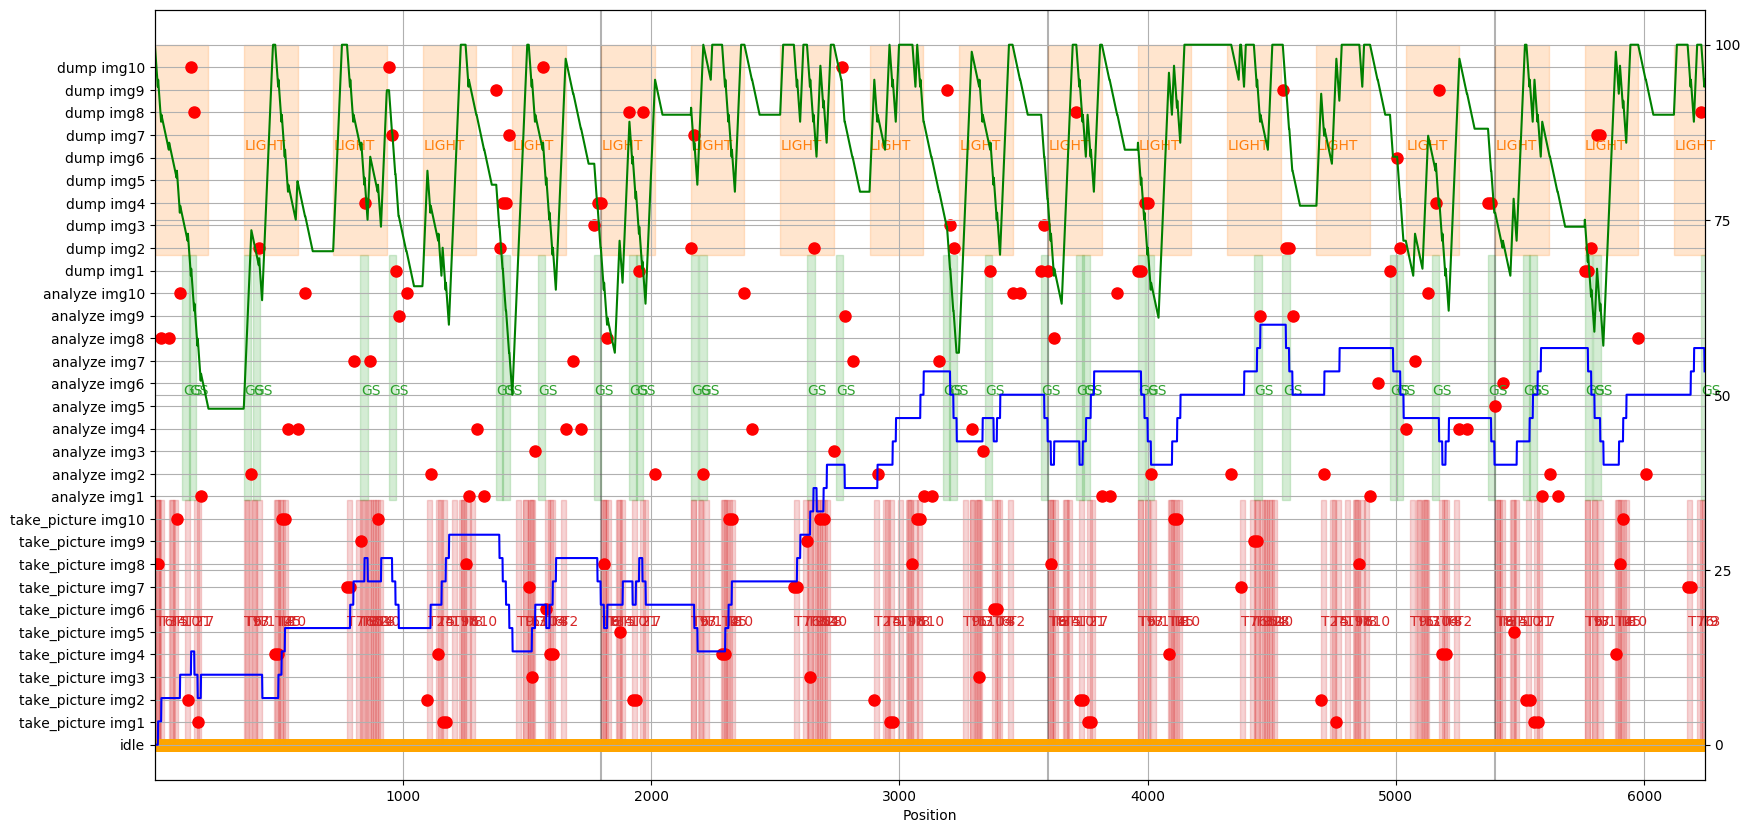

In [12]:
fig, ax = plotConfig(Config_dict, fig_size=fig_size, y_max = len(Config_dict["action_list"]), epsilon=2,x_min= Telemetry_dict["Pos"][p_ini], x_max=Telemetry_dict["Pos"][p_end])
for i, a in enumerate(Telemetry_dict["action"][p_ini:p_end]):
    i_pos = p_ini + i
    alp = 1.
    
    if (not Telemetry_dict["Busy"][i_pos-1] or i_pos==0):
        if Telemetry_dict["Valid Action"][i]:
            c = vC
        else:
            c = nvC
    else:    
        c = nvC
        alp = .5
    if a == 0:
        c = idleC
        alp = .5
    if i_pos==0:
        x_a = 0
    else:
        x_a = Telemetry_dict["Pos"][i_pos-1]
    ax.plot(x_a, a, c, marker="o", markersize=mks, alpha=alp)
ax.set_yticks([ a for a in range(total_actions)])
ax.set_yticklabels(Config_dict["action_list"])


ax2 = ax.twinx()  
ax2.plot(Telemetry_dict["Pos"], 100*Telemetry_dict["Memory Level"]/memory_size, "b", label="Reward")
ax2.plot(Telemetry_dict["Pos"], Telemetry_dict["Power"], "g", label="Reward")
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.grid()
ax.grid()
ax.set_xlabel("Position")
ax.set_xlim(Telemetry_dict["Pos"][max(0,p_ini-1)]-1, Telemetry_dict["Pos"][p_end])

## Schedule

(0.19999999999999996, 6243.600000000038)

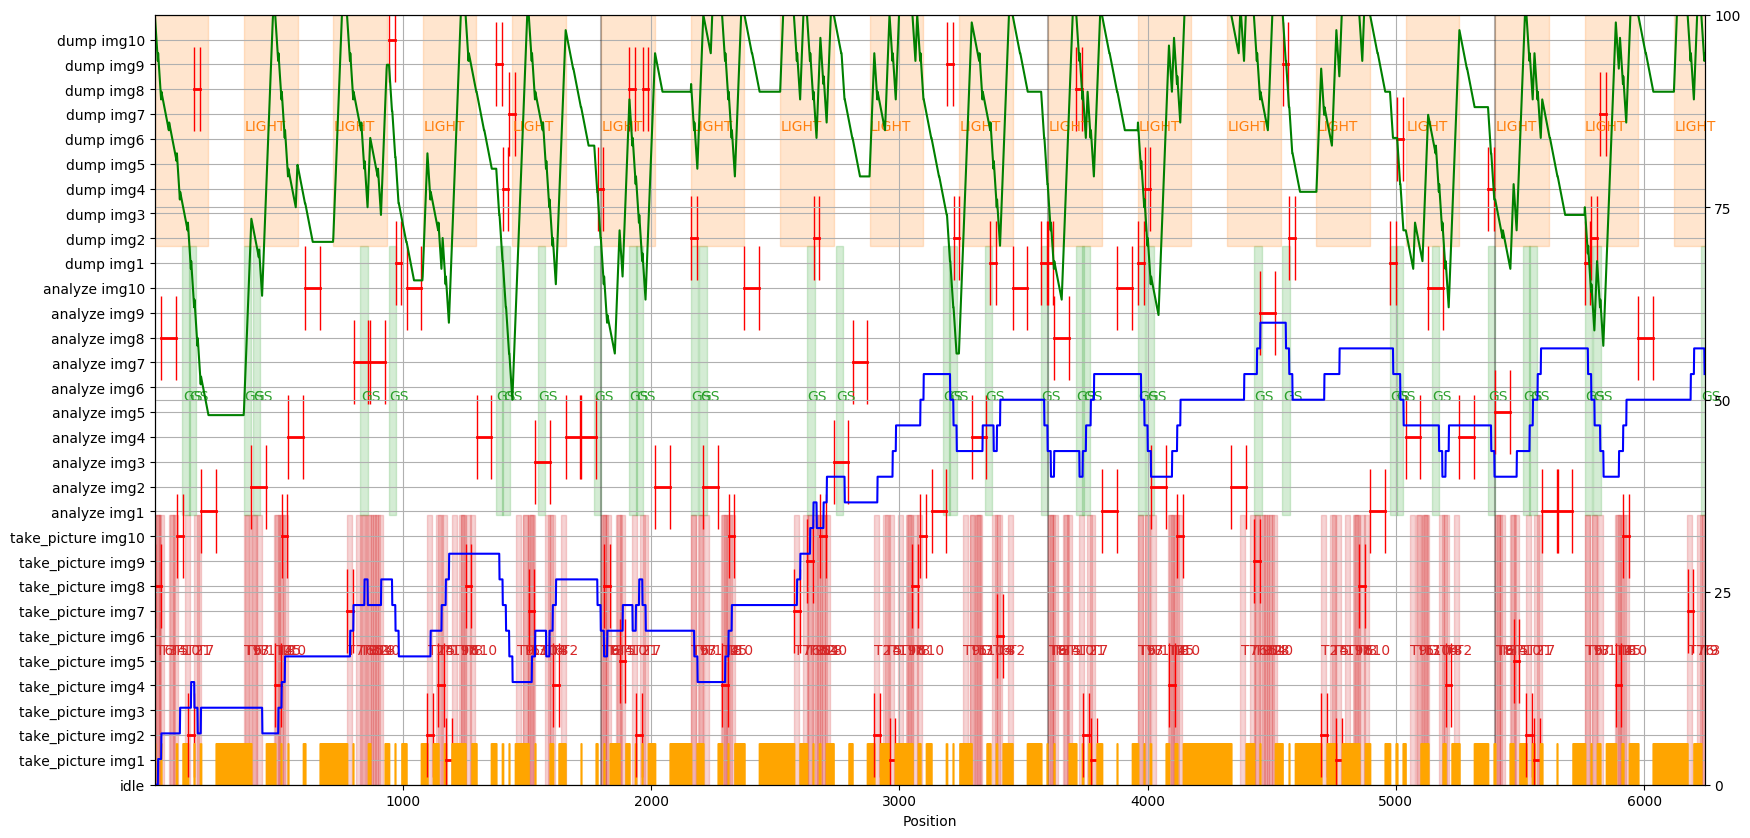

In [13]:
fig, ax = plotConfig(Config_dict, fig_size=fig_size, y_max = len(Config_dict["action_list"]), epsilon=2,x_min= Telemetry_dict["Pos"][p_ini], x_max=Telemetry_dict["Pos"][p_end])
ap = 1
x, y, y_v, y_m = [], [], [], []
pos_vec, action_vec = [], []
busytime = 0
for i, a in enumerate(Telemetry_dict["action"][p_ini:p_end]):
    i_pos = p_ini + i
    busytime -= 1
    if busytime <= 0:
        
        mkr = "|-"
        if action_vec != []:
            x.append(pos_vec)
            y.append(action_vec)
            y_v.append(c)
            y_m.append(mkr)
        
        if a!=0:
            if Telemetry_dict["Valid Action"][i_pos]:
                c = vC
            else:
                c = nvC
            busytime = action_duration[(a-1)//total_targets]
        else:
            c = idleC
        
        action_vec = []
        pos_vec = []
        
        # print(busytime)
        ap = a

    if i_pos==0:
        x_a = 0
    else:
        x_a = Telemetry_dict["Pos"][i_pos-1]
    action_vec.append(ap)
    pos_vec.append(x_a)


for i in range(len(x)):
    ax.plot(x[i], y[i], y_m[i], color=y_v[i], markersize=60, markevery=[0, -1], linewidth=2)
ax.set_yticks([ a for a in range(total_actions)])
ax.set_yticklabels(Config_dict["action_list"])


ax2 = ax.twinx()  
ax2.plot(Telemetry_dict["Pos"], 100*Telemetry_dict["Memory Level"]/memory_size, "b", label="Reward")
ax2.plot(Telemetry_dict["Pos"], Telemetry_dict["Power"], "g", label="Reward")
ax2.set_yticks([0, 25, 50, 75, 100])
ax2.set_ylim(0, 100)
ax2.grid()
ax.grid()
ax.set_ylim(0, total_actions)
ax.set_xlabel("Position")
ax.set_xlim(Telemetry_dict["Pos"][max(0,p_ini-1)]-1, Telemetry_dict["Pos"][p_end])